# Introduction
This is generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-stock-rates-20092020/BTC-INR.csv


### Let's check the file: /kaggle/input/bitcoin-stock-rates-20092020/BTC-INR.csv

In [2]:
df = pd.read_csv("/kaggle/input/bitcoin-stock-rates-20092020/BTC-INR.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,19907.673828,5.091154e+08
1,2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,19932.076172,4.973433e+08
2,2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,17784.058594,2.091352e+09
3,2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,16715.617188,3.519653e+09
4,2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,17385.183594,2.784604e+09
...,...,...,...,...,...,...,...
2084,2020-09-15,783743.500000,805171.375000,784334.625000,794767.375000,794767.375000,2.393032e+12
2085,2020-09-16,794827.062500,815449.000000,787992.437500,807217.437500,807217.437500,2.263169e+12
2086,2020-09-17,807095.875000,812299.562500,793557.125000,805666.625000,805666.625000,2.807350e+12
2087,2020-09-18,805874.875000,810188.437500,796956.625000,805632.625000,805632.625000,1.939031e+12


Lower the column names for easy typing and fast.

In [3]:
df.columns= df.columns.str.lower()
df.describe()

,open,high,low,close,adj close,volume
count,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03
mean,3.201911e+05,3.281296e+05,3.117774e+05,3.205650e+05,3.205650e+05,6.000360e+11
std,2.886620e+05,2.964552e+05,2.797733e+05,2.887939e+05,2.887939e+05,8.734315e+11
min,1.098354e+04,1.309874e+04,1.064906e+04,1.105842e+04,1.105842e+04,4.973433e+08
25%,3.789812e+04,3.846323e+04,3.725383e+04,3.807963e+04,3.807963e+04,4.700671e+09
50%,2.689865e+05,2.751796e+05,2.615442e+05,2.692679e+05,2.692679e+05,2.208644e+11
75%,5.613931e+05,5.770689e+05,5.445726e+05,5.621695e+05,5.621695e+05,9.640915e+11
max,1.247814e+06,1.287102e+06,1.215670e+06,1.249198e+06,1.249198e+06,5.484561e+12


Getting info for dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2089 non-null   object 
 1   open       2088 non-null   float64
 2   high       2088 non-null   float64
 3   low        2088 non-null   float64
 4   close      2088 non-null   float64
 5   adj close  2088 non-null   float64
 6   volume     2088 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.4+ KB


Let's add the Year and Month columns for analysis different Year and Months.

In [5]:
df["date_year"] = pd.DatetimeIndex(df["date"]).year
df["date_month"] = pd.DatetimeIndex(df["date"]).month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2089 non-null   object 
 1   open        2088 non-null   float64
 2   high        2088 non-null   float64
 3   low         2088 non-null   float64
 4   close       2088 non-null   float64
 5   adj close   2088 non-null   float64
 6   volume      2088 non-null   float64
 7   date_year   2089 non-null   int64  
 8   date_month  2089 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 147.0+ KB


Check the null values.

In [7]:
df.isnull().sum()

date          0
open          1
high          1
low           1
close         1
adj close     1
volume        1
date_year     0
date_month    0
dtype: int64

Drop the NULL rows.

In [8]:
df = df.dropna()

### Import libraries for generating graphs.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Creating year-wise dataframes except 2020 because not having the data for all months in 2020.

In [10]:
df_2015 = df[df["date_year"]==2015]
df_2016 = df[df["date_year"]==2016]
df_2017 = df[df["date_year"]==2017]
df_2018 = df[df["date_year"]==2018]
df_2019 = df[df["date_year"]==2019]

In [11]:
df_2015

,date,open,high,low,close,adj close,volume,date_year,date_month
0,2015-01-01,20197.017578,20197.017578,19892.089844,19907.673828,19907.673828,5.091154e+08,2015,1
1,2015-01-02,19896.906250,19983.132813,19864.343750,19932.076172,19932.076172,4.973433e+08,2015,1
2,2015-01-03,19920.306641,19939.541016,17784.058594,17784.058594,17784.058594,2.091352e+09,2015,1
3,2015-01-04,17788.107422,18173.042969,16299.111328,16715.617188,16715.617188,3.519653e+09,2015,1
4,2015-01-05,16771.865234,17625.943359,16771.865234,17385.183594,17385.183594,2.784604e+09,2015,1
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,27496.380859,27991.033203,26992.615234,27912.871094,27912.871094,3.537850e+09,2015,12
361,2015-12-28,27947.199219,28399.136719,27672.263672,27928.308594,27928.308594,3.282953e+09,2015,12
362,2015-12-29,27916.337891,28688.501953,27900.189453,28688.501953,28688.501953,3.418671e+09,2015,12
363,2015-12-30,28709.503906,28815.148438,28038.787109,28349.837891,28349.837891,3.115904e+09,2015,12


### Plot the close cost for Bitcoin for all available years.

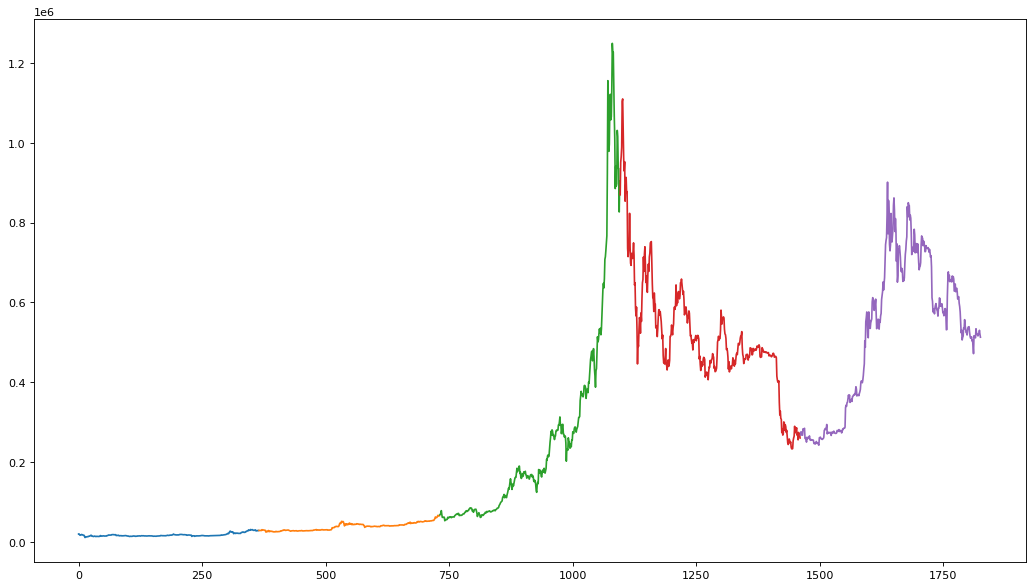

In [12]:
fig = plt.figure(figsize=(16,9), dpi= 80)
ax1 = fig.add_subplot()
# some data
for i in range(2015, 2020):
    x = eval(f"df_{i}.index")
    y = eval(f"df_{i}['close']")
    ax1.plot(x, y)

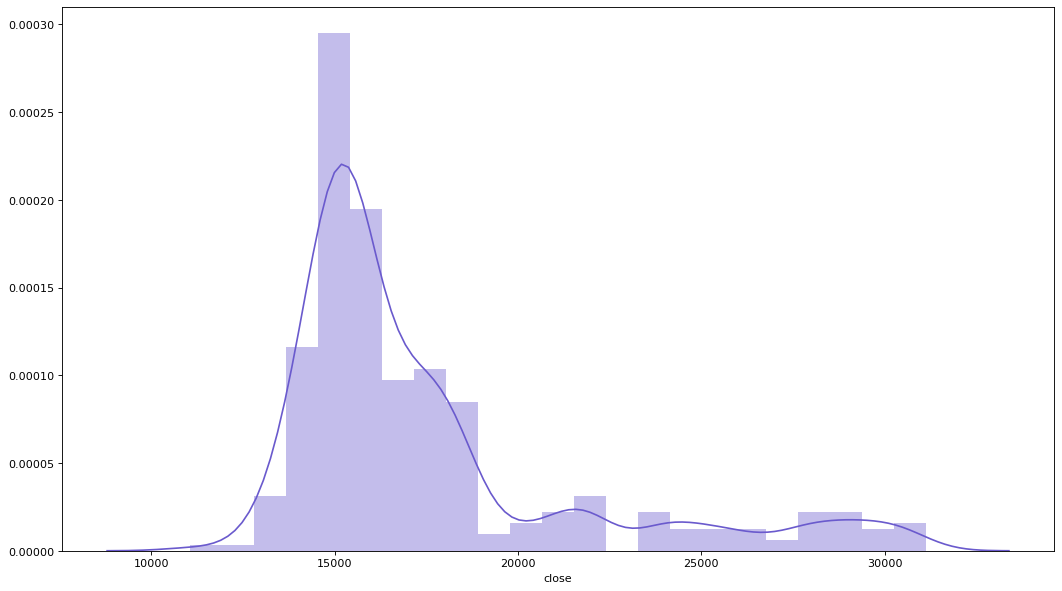

In [13]:
plt.figure(figsize=(16,9), dpi= 80)
sns.set_color_codes()
sns.distplot(df_2015['close'],color = 'slateblue')
plt.show()

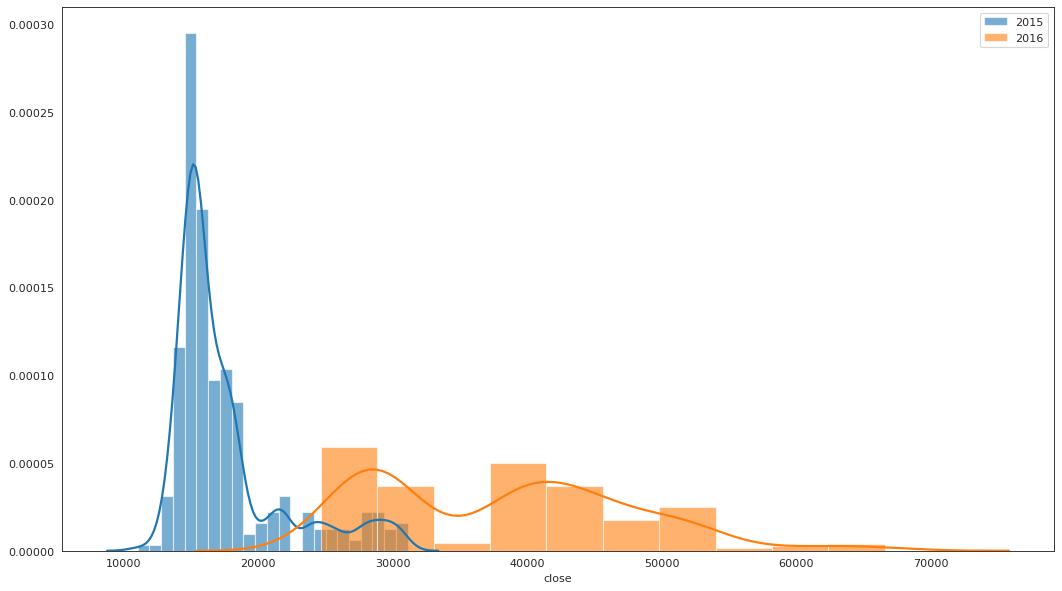

In [14]:
sns.set_style("white")

x1 = df.loc[df.date_year==2015, 'close']
x2 = df.loc[df.date_year==2016, 'close']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(16,9), dpi= 80)
sns.distplot(x1, label=2015, **kwargs)
sns.distplot(x2, label="2016", **kwargs)
plt.legend()

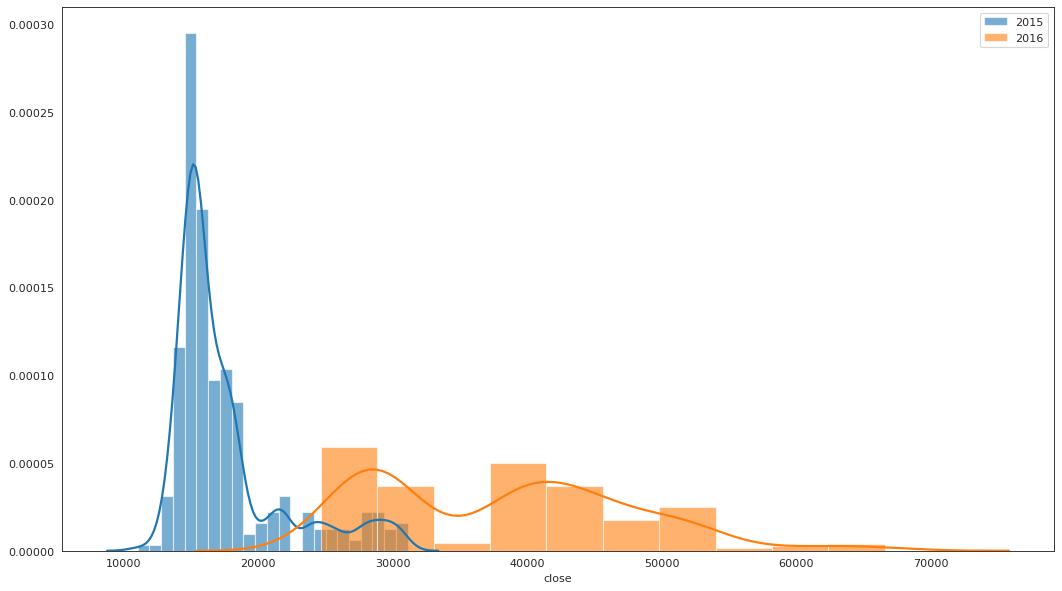

In [15]:
sns.set_style("white")
plt.figure(figsize=(16,9), dpi= 80)
for i in range(2015, 2017):
    x = eval(f"df.loc[df.date_year=={i}, 'close']")
    # Plot
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
    sns.distplot(x, label=i, **kwargs)
    plt.legend()

Text(0.5, 1.0, 'Density Plot of City Mileage by n_cilinders')

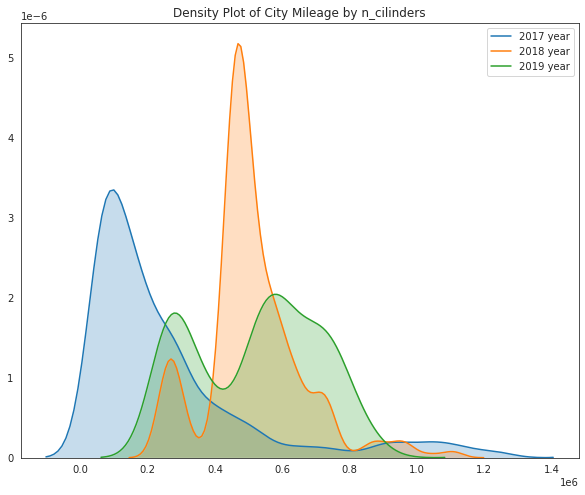

In [16]:
# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in range(2017, 2020):
    # extract the data
    x = eval(f"df.loc[df.date_year=={i}, 'close']")
    # plot the data using seaborn
    sns.kdeplot(x, shade=True, label = "{} year".format(i))

# set the title of the plot
plt.title("Density Plot of City Mileage by n_cilinders")

In [17]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### Scatter and density plots:

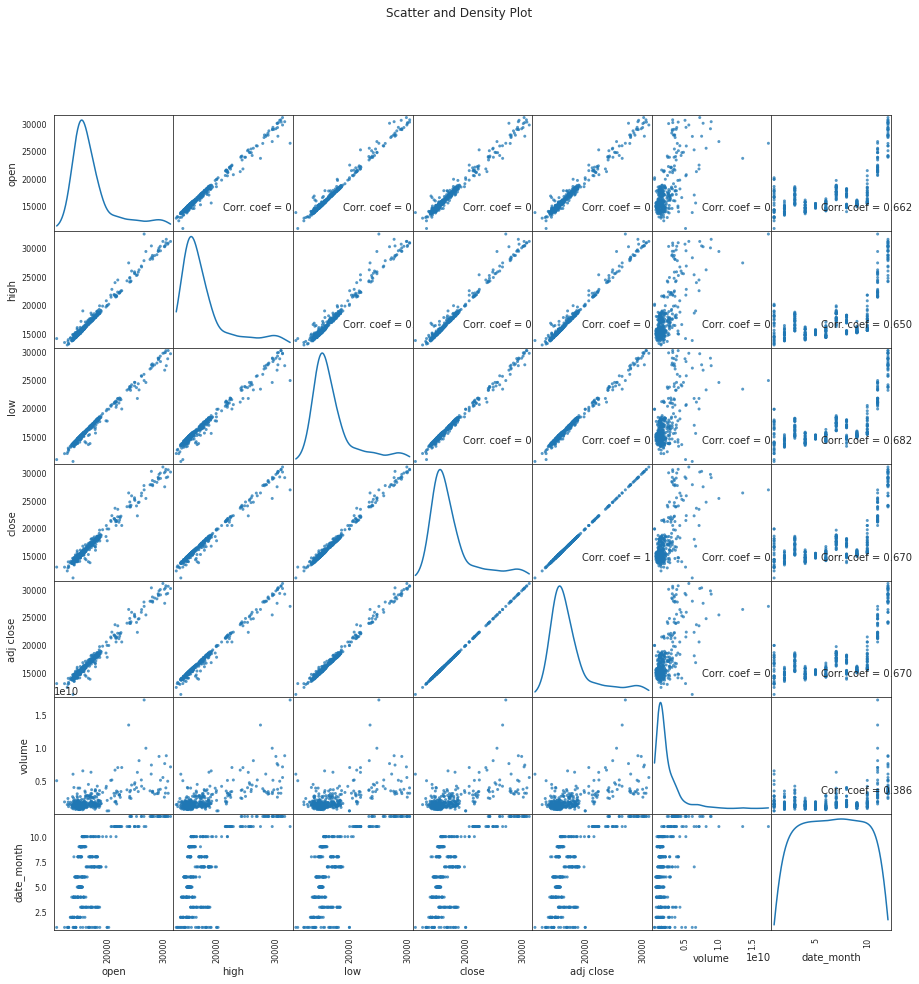

In [18]:
plotScatterMatrix(df_2015, 15, 10)

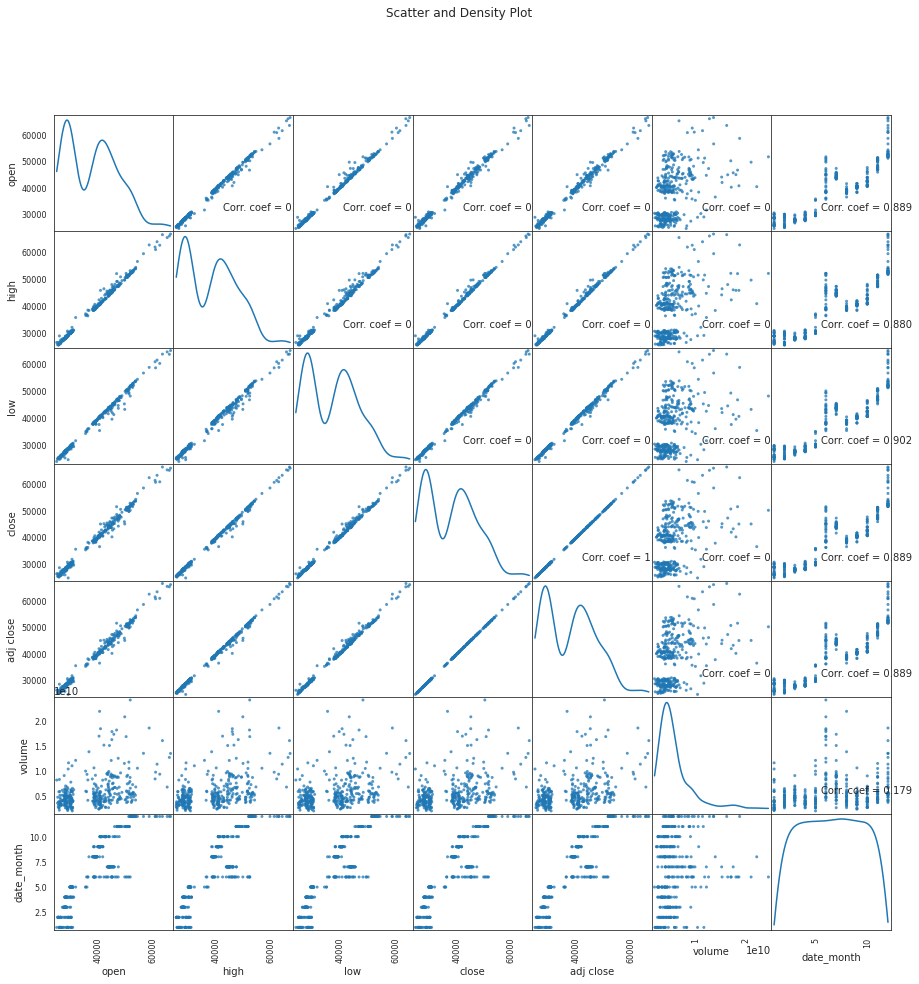

In [19]:
plotScatterMatrix(df_2016, 15, 10)

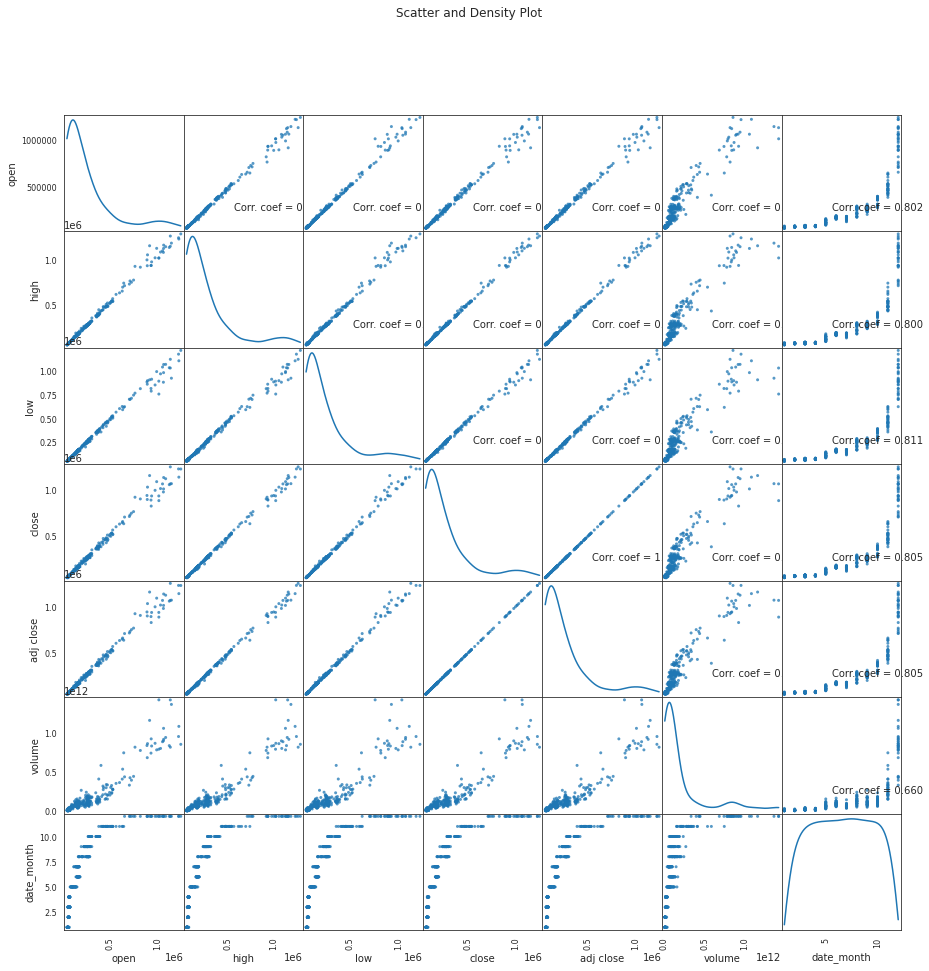

In [20]:
plotScatterMatrix(df_2017, 15, 10)

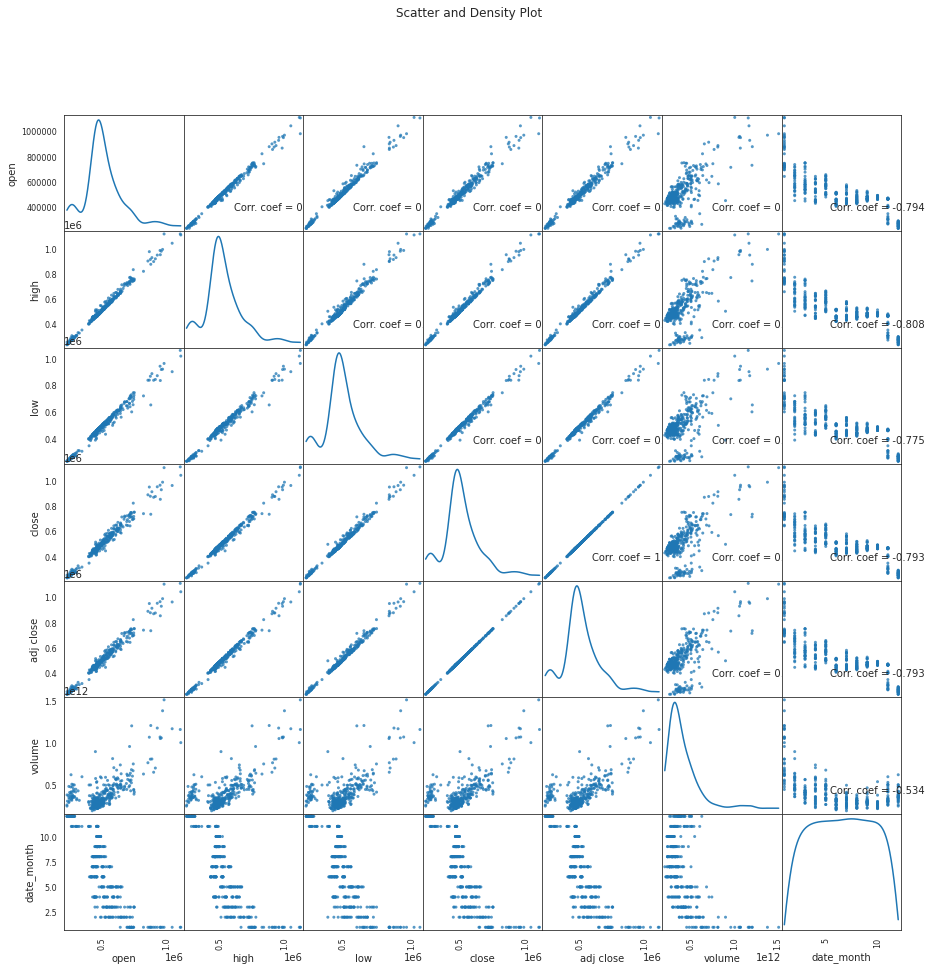

In [21]:
plotScatterMatrix(df_2018, 15, 10)

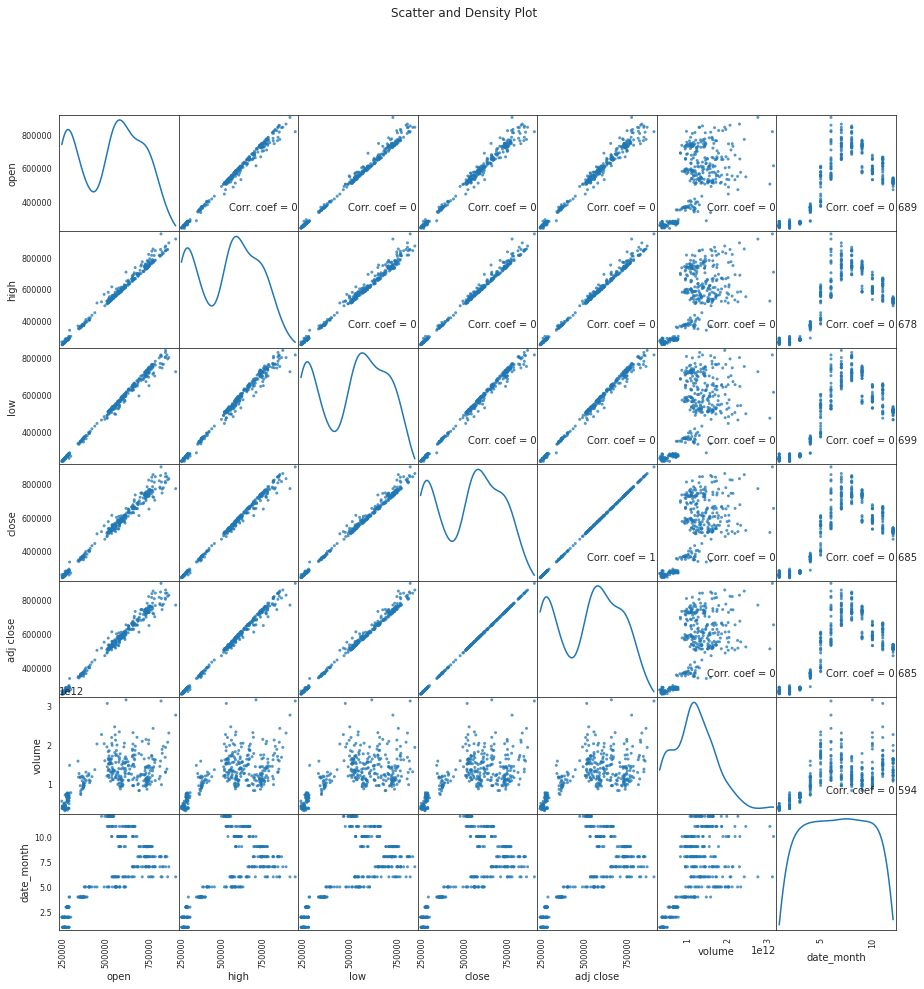

In [22]:
plotScatterMatrix(df_2019, 15, 10)

# Pandas Profiling for Dataset

1. Install it with this command:

In [23]:
pip install pandas-profiling

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## import pandas_profiling

In [24]:
from pandas_profiling import ProfileReport

### Generate Profile

Generate profile of your data using ProfileReport. And save it to .html file.

In [25]:
profile = ProfileReport(df, title="Profiling Report: bitcoin-stock-rates")
profile.to_file(output_file='profile.html')

In [26]:
!pip install art
import art

     |████████████████████████████████| 552 kB 2.9 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [27]:
art.tprint("DONE.")

 ____    ___   _   _  _____    
|  _ \  / _ \ | \ | || ____|   
| | | || | | ||  \| ||  _|     
| |_| || |_| || |\  || |___  _ 
|____/  \___/ |_| \_||_____|(_)
                               

